In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
pca = PCA(n_components=scaled_X_train.shape[1])
pca_transform = pca.fit_transform(scaled_X_train)


(381, 30)


In [9]:
pca.explained_variance_ratio_

array([4.32034362e-01, 1.98534750e-01, 9.80816513e-02, 6.50031120e-02,
       5.15098214e-02, 4.20420694e-02, 2.26471250e-02, 1.69757997e-02,
       1.29754455e-02, 1.21150953e-02, 1.04047339e-02, 8.82553474e-03,
       8.05898859e-03, 5.11718469e-03, 2.79727033e-03, 2.26321052e-03,
       1.97300147e-03, 1.78954632e-03, 1.66253597e-03, 1.05243069e-03,
       9.08690423e-04, 8.84491302e-04, 7.45627005e-04, 5.61952738e-04,
       4.98462201e-04, 2.39315567e-04, 2.19303624e-04, 4.93040172e-05,
       2.53610171e-05, 3.82323987e-06])

In [10]:
import numpy as np
proportion_explain = np.cumsum(pca.explained_variance_ratio_)
print(proportion_explain)

[0.43203436 0.63056911 0.72865076 0.79365388 0.8451637  0.88720577
 0.90985289 0.92682869 0.93980414 0.95191923 0.96232397 0.9711495
 0.97920849 0.98432567 0.98712294 0.98938615 0.99135916 0.9931487
 0.99481124 0.99586367 0.99677236 0.99765685 0.99840248 0.99896443
 0.99946289 0.99970221 0.99992151 0.99997082 0.99999618 1.        ]


[Text(0.5, 1.0, 'Knee plot for PVE'),
 Text(0.5, 0, 'Number of PCs used'),
 Text(0, 0.5, 'PVE')]

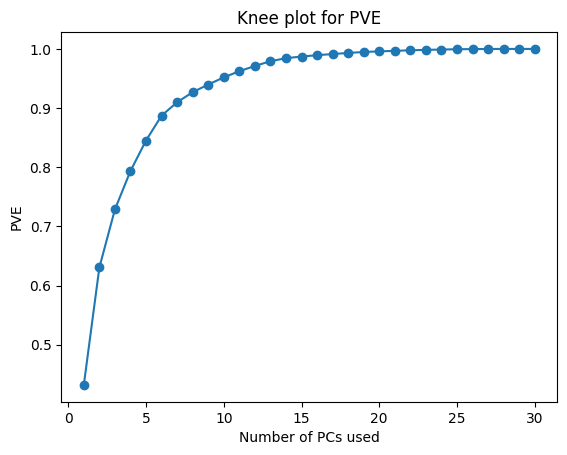

In [13]:
import matplotlib.pyplot as plt
ax = plt.axes()

ax.plot(range(1,31), proportion_explain, "-o")
ax.set(title="Knee plot for PVE", xlabel="Number of PCs used", ylabel="PVE")

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

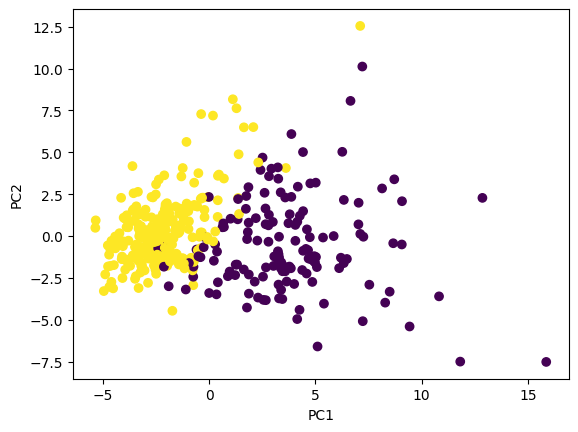

In [14]:
ax = plt.axes()
ax.scatter(pca_transform[:,0], pca_transform[:,1], c=y_train)
ax.set(xlabel="PC1", ylabel="PC2")

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



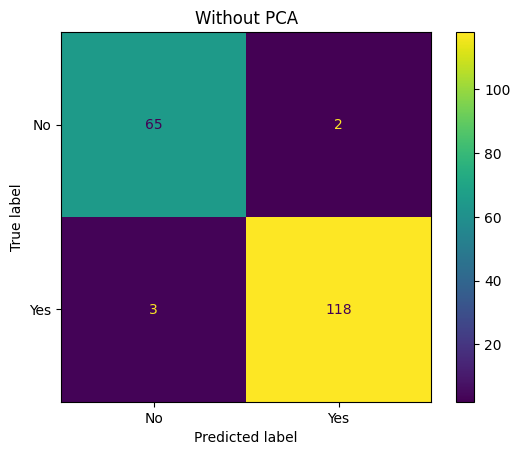

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.svm import SVC
def evaluate_model(model, title= ""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
    plt.title(title)

pipe_PCA = Pipeline([("scaling", StandardScaler()), ("dim_red", PCA(10)), ("svm", SVC(kernel="linear"))])

pipe_no_PCA = Pipeline([("scaling", StandardScaler()), ("svm", SVC(kernel="linear"))])

evaluate_model(pipe_no_PCA, title="Without PCA")    

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



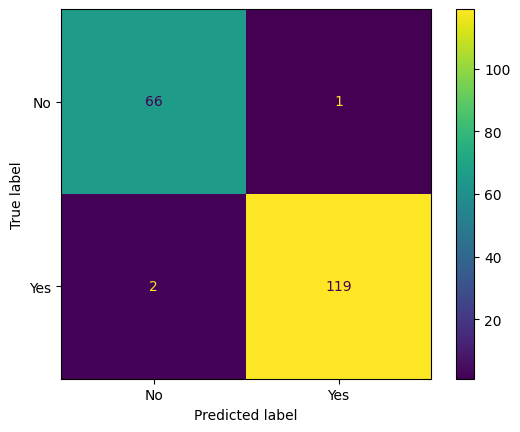

In [18]:
evaluate_model(pipe_PCA)